**Problem Statement**

A bike-sharing provider has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

* Which variables are significant in predicting the demand for shared bikes.
* How well those variables describe the bike demands
* Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 

**Business Goal:**
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

In [1]:
#importing required libraries and packages
import numpy as np
np.random.seed(0)
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse

pd.set_option('max_columns', 100)

In [2]:
#Function Definitions

#Function to get the VIFs for all the variables in a dataframe
def getvif(df):
    if 'const' in list(df.columns):
        df1=df.drop('const', axis=1) 
    else:
        df1 = df.copy()
    vif=pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif.VIF,2)
    vif = vif.sort_values(by = 'VIF', ascending = False)
    return vif


#Function to print Model Evaluation parameters
def modeleval(y_actual, y_pred, x_test):
    print('R2 Score of Model')
    print(r2_score(y_true = y_actual, y_pred = y_pred))
    print('\nMean Absolute Error')
    print(mae(y_true = y_actual, y_pred = y_pred))
    print('\nMean Squared Error')
    print(mse(y_true = y_actual, y_pred = y_pred))
    print('\nRoot Mean Squared Error')
    print(np.sqrt(mse(y_true = y_actual, y_pred = y_pred)))
    print('\nAdjusted R-squared')
    print(1 - (1-r2_score(y_true = y_actual, y_pred = y_pred))*(len(y_actual)-1)/(len(y_actual)-x_test_m6.shape[1]-1))

In [3]:
#importing the data
df = pd.read_csv('../input/bike-sharing-demand/day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


#  Starting EDA on the data set

In [4]:
df.shape

(730, 16)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
#There are no null values
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [8]:
#Dropping columns we would not be needing/using
#Instant is just an identifier
#dteday is the date and can be analyzed using other columns in the dataset, so it is redundant
#casual and registered are part of cnt
df.drop(['instant','dteday','casual','registered'], axis = 1, inplace = True)

# Visualizing the data

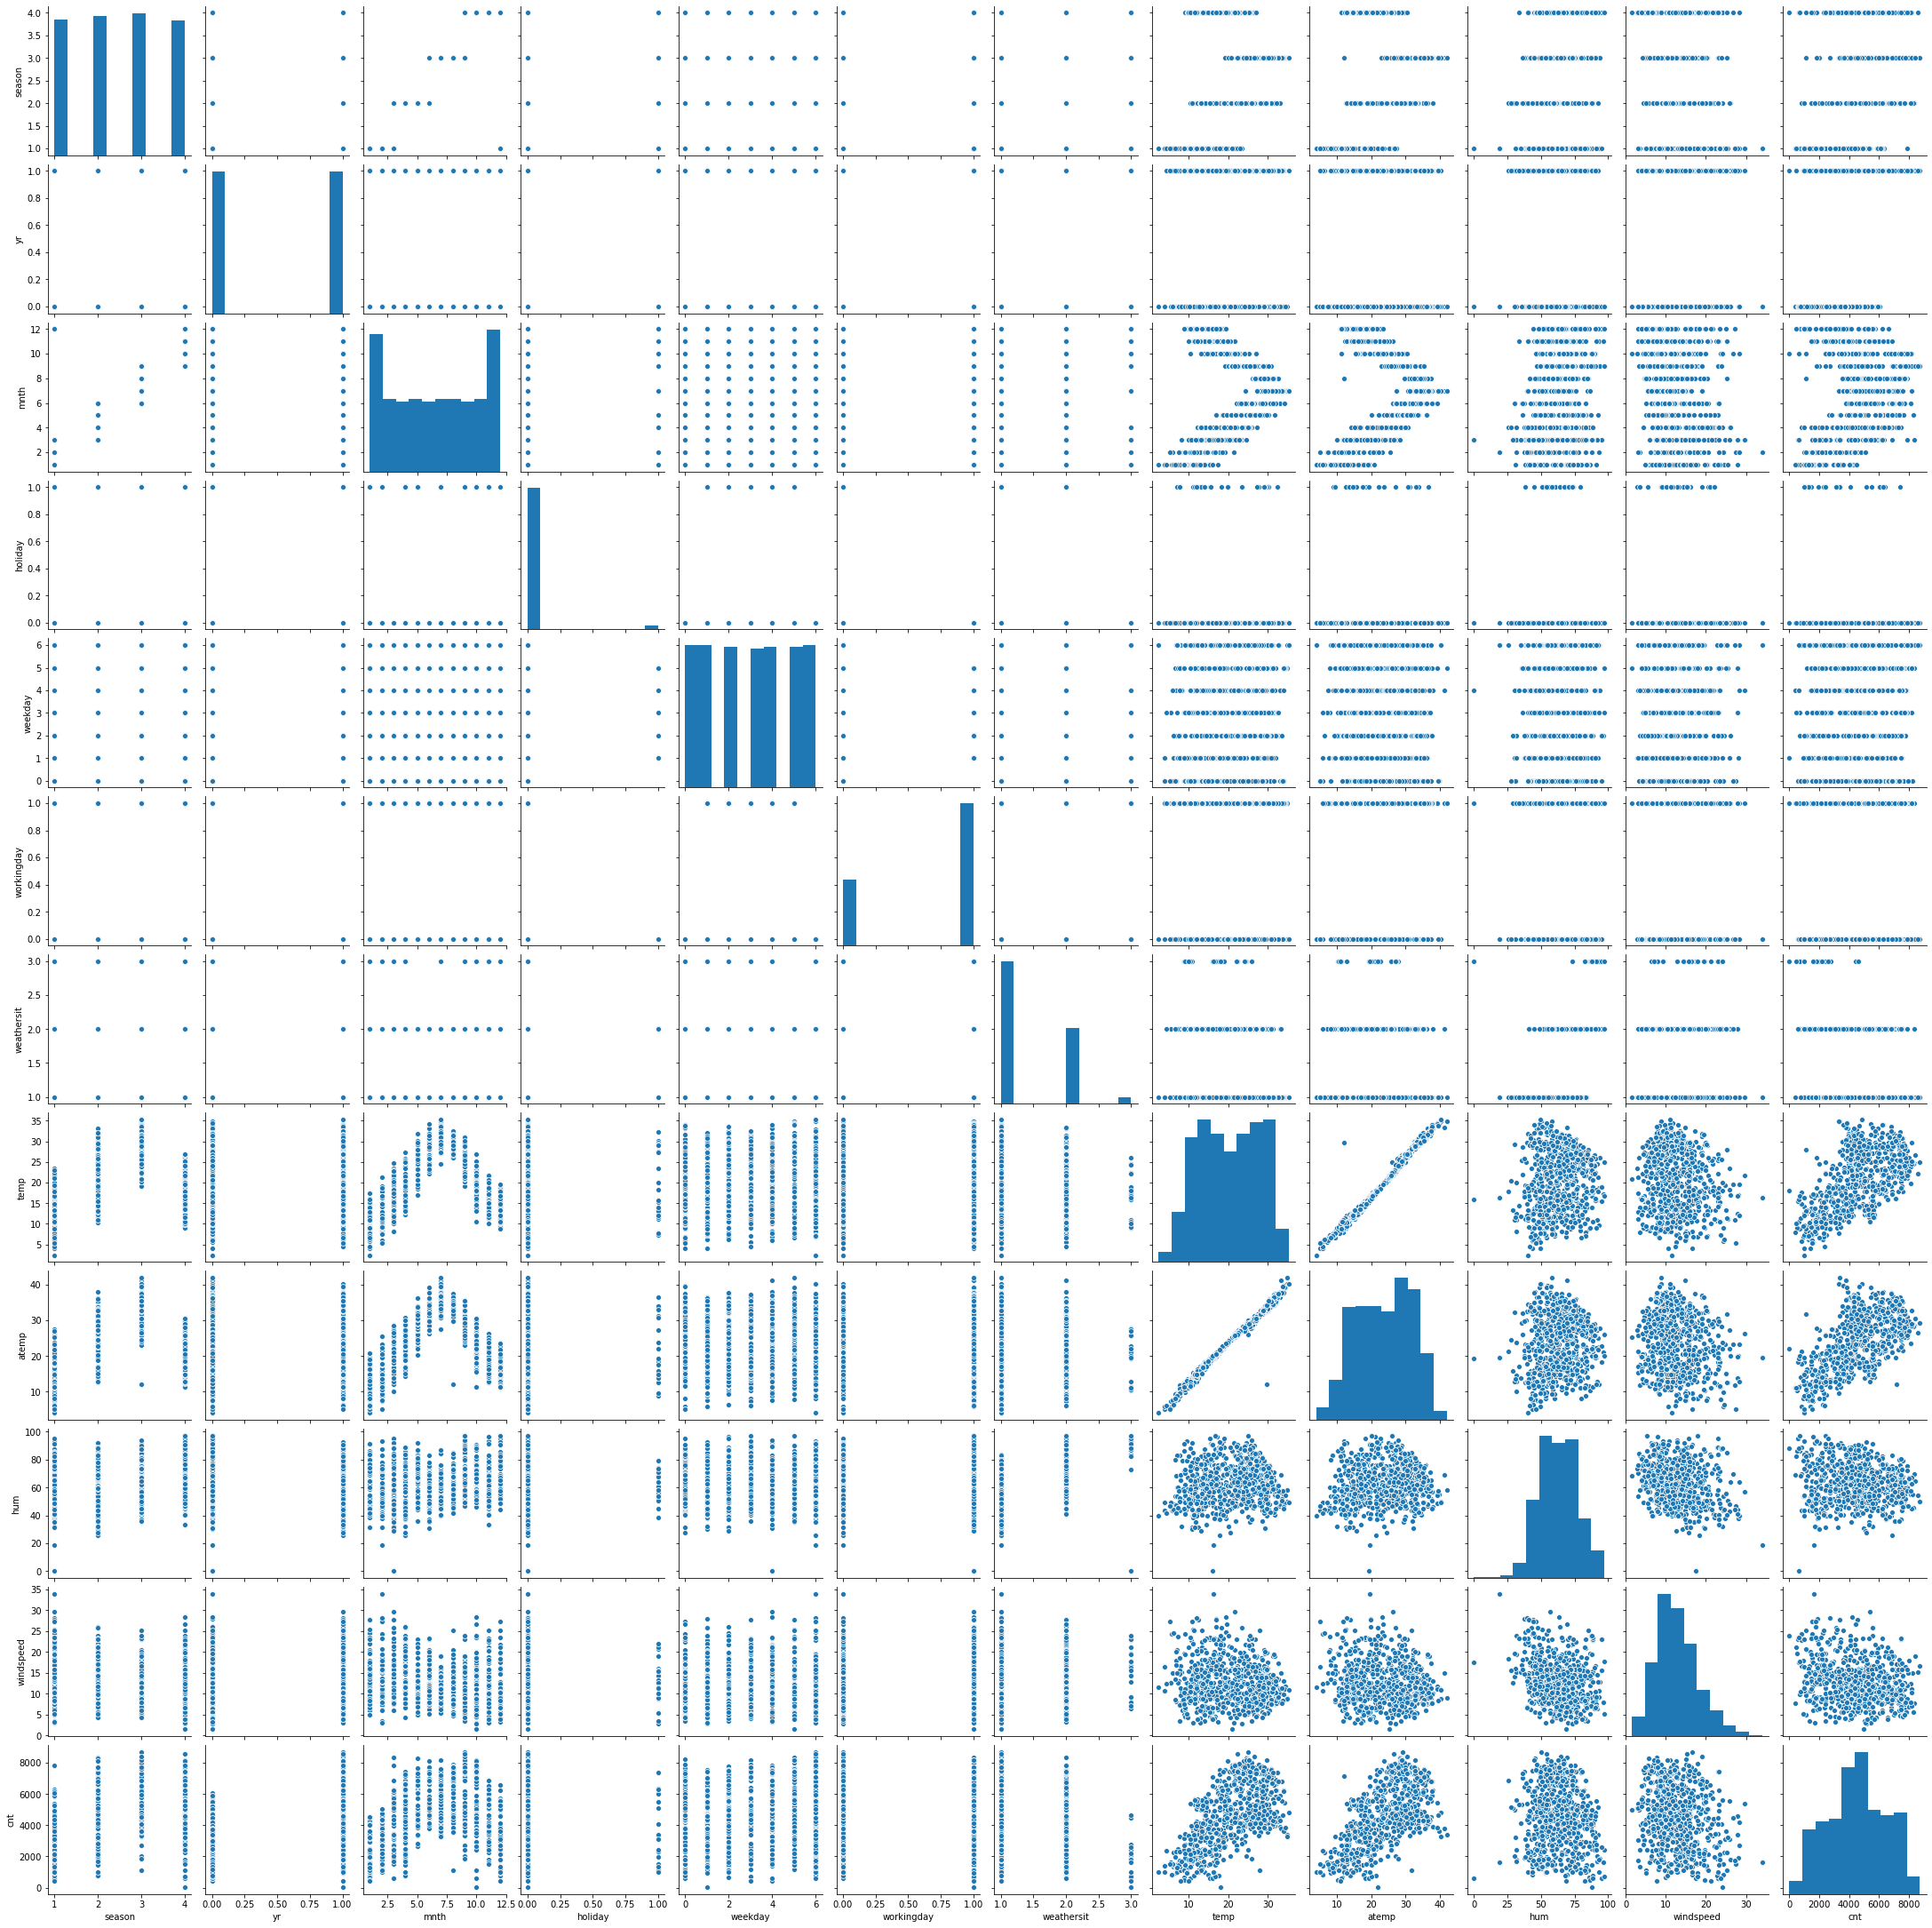

In [9]:
#Getting a pairplot for the entire dataset
pp = sns.pairplot(df)
fig = pp.fig
fig.savefig("output.png")

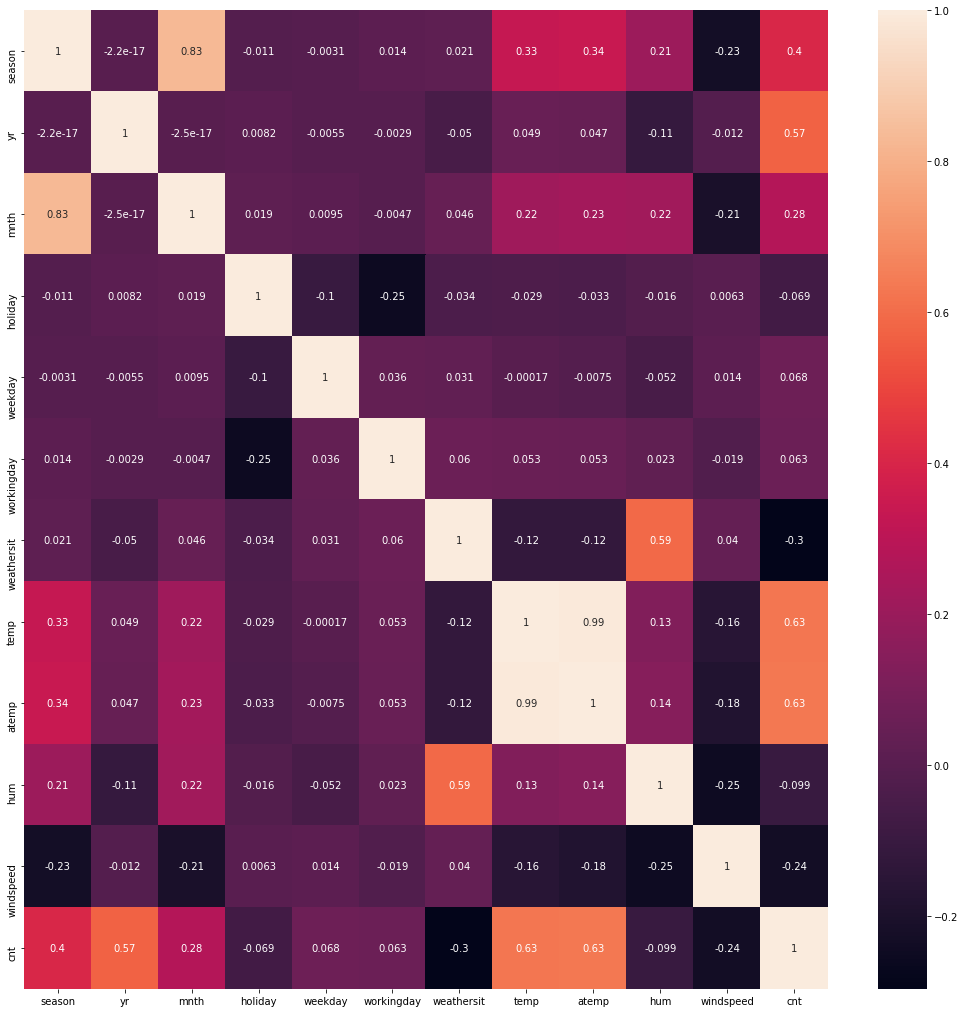

In [10]:
#Visalizing correlation between different varaibles
fig, ax = plt.subplots(figsize=(18,18))
sns.heatmap(df.corr(), annot=True, ax=ax)
plt.show()

In [11]:
#We see a high correlation between temp and atemp. Both of those together will not be crucial to the model and will lead to a very high (maybe infinite) VIF. 
#Hence, dropping atemp
df.drop(['atemp'], axis = 1, inplace = True)

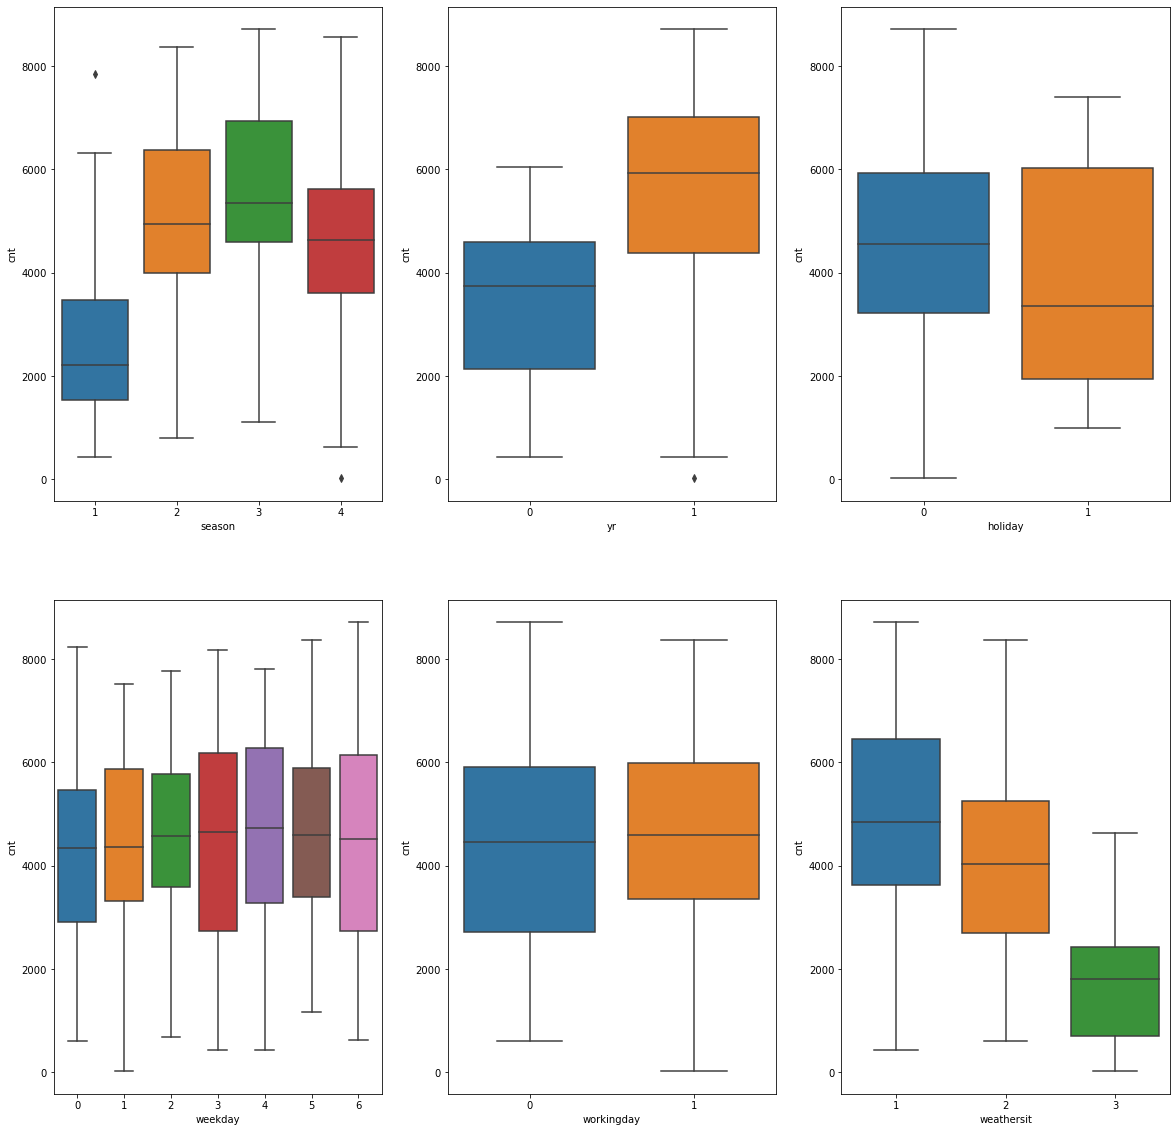

In [12]:
#Visalizing categorical variables
plt.figure(figsize = (20,20))
catcols = ['season','yr','holiday','weekday','workingday','weathersit']
for i in range(1,7):
    plt.subplot(2,3,i)
    sns.boxplot(x = catcols[i-1], y = 'cnt', data = df)

plt.savefig('box')    

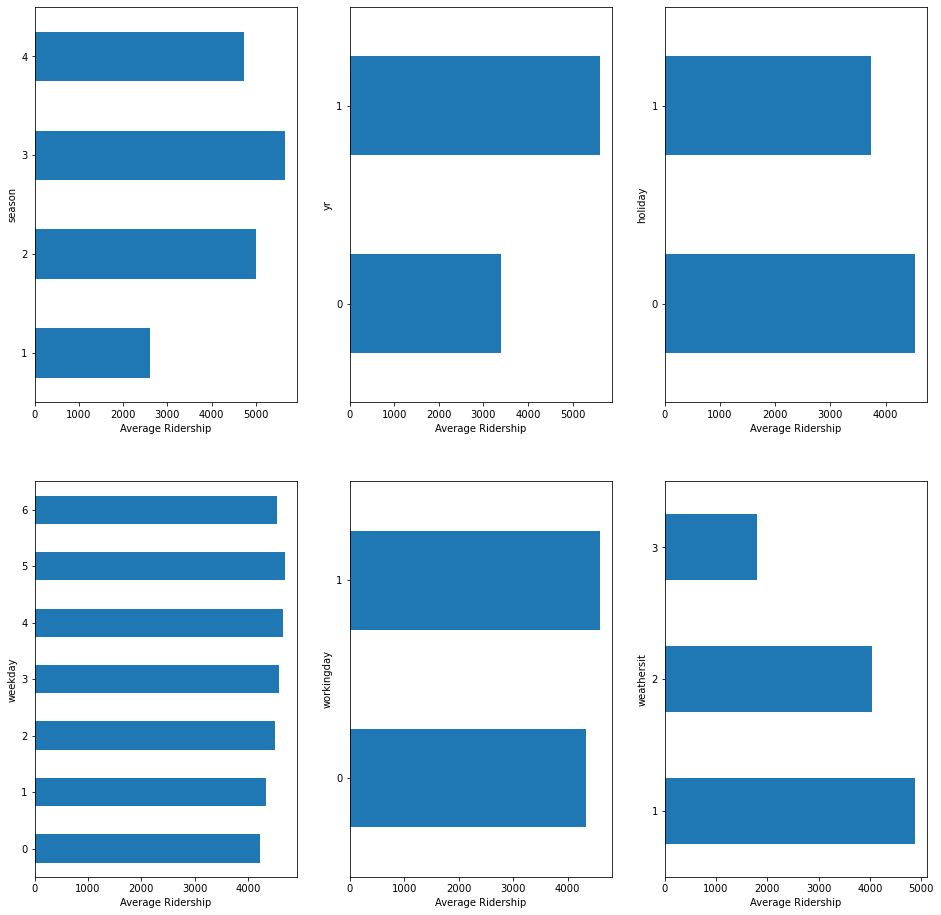

In [13]:
#Let's see the AVERAGE ridership across categorical variables
plt.figure(figsize=(16,16))
plt.subplot(2,3,i)
for i in range(1,7):
    plt.subplot(2,3,i)
    df.groupby(catcols[i-1])['cnt'].mean().plot.barh()
    plt.xlabel('Average Ridership')
plt.savefig('barh.png')
plt.show()


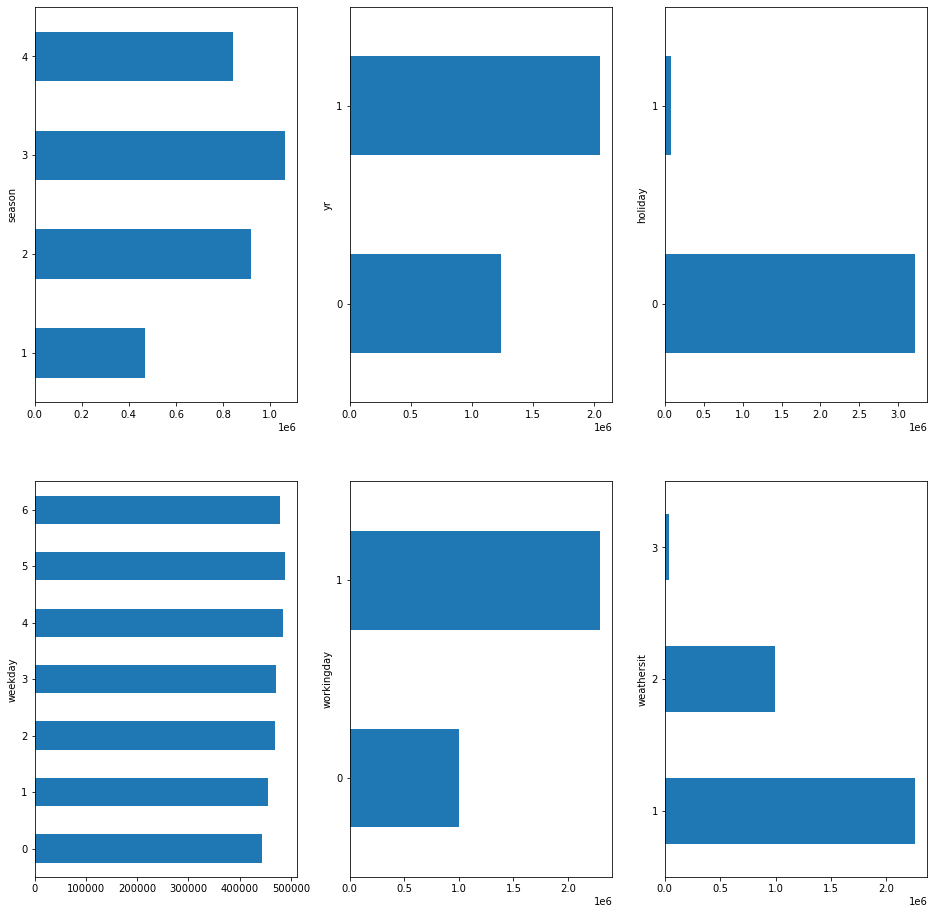

In [14]:
#Let's see the TOTAL ridership across variables
plt.figure(figsize=(16,16))
plt.subplot(2,3,i)
for i in range(1,7):
    plt.subplot(2,3,i)
    df.groupby(catcols[i-1])['cnt'].sum().plot.barh()
plt.show()

# Preparing the data for model building

In [15]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,43.6957,12.522300,1600


In [16]:
#changing the integer encodings to string for the season, mnth, weekday and creating dummy variables for all of these (since they do not have an associated cardinality)
df.season = df.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
seasons = pd.get_dummies(df.season, drop_first = True)
df.mnth = df.mnth.map({1:'jan', 2:'feb', 3:'mar', 4:'apr',5:'may', 6:'jun', 7:'jul', 8:'aug',9:'sep', 10:'oct', 11:'nov', 12:'dec'})
months = pd.get_dummies(df.mnth, drop_first = True)
df.weekday = df.weekday.map({1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat',0:'sun'})
weekdays = pd.get_dummies(df.weekday, drop_first = True)
df.weathersit = df.weathersit.map({1:'clear',2:'cloudy',3:'light rain',4:'heavy rain'})
weather = pd.get_dummies(df.weathersit, drop_first = True)

In [17]:
#Inspecting the created dummy variables (already dropped the first one)

In [18]:
seasons.head()

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [19]:
months.head()

,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [20]:
weekdays.head()

,mon,sat,sun,thu,tue,wed
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,1,0,0,0,0,0
3,0,0,0,0,1,0
4,0,0,0,0,0,1


In [21]:
weather.head()

,cloudy,light rain
0,1,0
1,1,0
2,0,0
3,0,0
4,0,0


In [22]:
#Let's add these dummy variables to the data frame and remove the original columns which are now dummified
df = pd.concat([df,seasons,months,weekdays,weather], axis = 1)
df.drop(['season','mnth','weekday','weathersit'],axis = 1, inplace = True)
df.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep,mon,sat,sun,thu,tue,wed,cloudy,light rain
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


# Performing train/test split on the data

In [23]:
#Splitting the data in 70:30 ratio
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [24]:
df_train.shape

(510, 29)

In [25]:
df_test.shape

(219, 29)

# Rescaling features

In [26]:
#Now that we have split the data, we can work on scaling the variables in the train data set.
#We will be using the MinMaxScaler
scaler = MinMaxScaler()
to_scale = ['temp', 'hum', 'windspeed','cnt']
#fitting the scaler on the training dataset only
df_train[to_scale] = scaler.fit_transform(df_train[to_scale])

In [27]:
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep,mon,sat,sun,thu,tue,wed,cloudy,light rain
653,1,0,1,0.509887,0.575354,0.300794,0.864243,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0
728,1,0,0,0.245101,0.498067,0.663106,0.204096,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [28]:
df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep,mon,sat,sun,thu,tue,wed,cloudy,light rain
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,0.096078,0.084314,0.066667,0.088235,0.076471,0.074510,0.098039,0.084314,0.086275,0.086275,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.343137,0.029412
std,0.500429,0.157763,0.468282,0.225844,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,0.294988,0.278131,0.249689,0.283915,0.266010,0.262857,0.297660,0.278131,0.281045,0.281045,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.475223,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


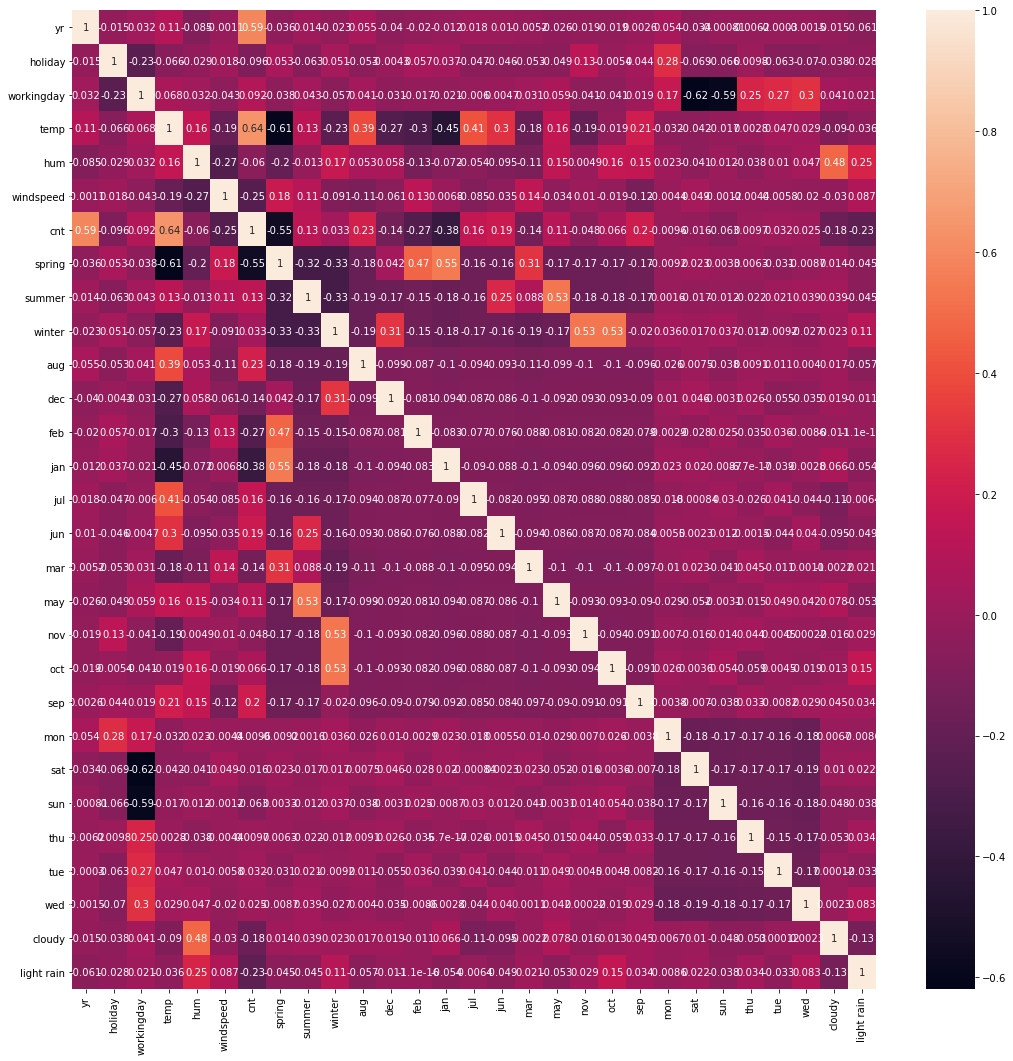

In [29]:
#Visualizing correlation between all the variables now in the data
fig, ax = plt.subplots(figsize=(18,18))
sns.heatmap(df_train.corr(), annot = True, ax = ax)
plt.show()

# Building the Model

In [30]:
#defining x_train and y_train, x_test and y_test
x_train = df_train.drop(['cnt'], axis=1)
y_train = df_train[['cnt']]

x_test = df_test.drop(['cnt'], axis = 1)
y_test = df_test[['cnt']]

In [31]:
#Perform Recursive Feature Elimination 
lm = LinearRegression()
lm.fit(x_train, y_train)

rfe = RFE(lm, 15) #We will set number of output variables to 15
rfe = rfe.fit(x_train , y_train)
list(zip(x_train.columns, rfe.support_ , rfe.ranking_ ))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('aug', False, 6),
 ('dec', False, 3),
 ('feb', False, 4),
 ('jan', True, 1),
 ('jul', True, 1),
 ('jun', False, 13),
 ('mar', False, 14),
 ('may', False, 5),
 ('nov', False, 2),
 ('oct', False, 10),
 ('sep', True, 1),
 ('mon', False, 8),
 ('sat', True, 1),
 ('sun', False, 7),
 ('thu', False, 11),
 ('tue', False, 9),
 ('wed', False, 12),
 ('cloudy', True, 1),
 ('light rain', True, 1)]

In [32]:
#Let's see which columns were selected
cols_selected = x_train.columns[rfe.support_]
cols_selected

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'spring',
       'summer', 'winter', 'jan', 'jul', 'sep', 'sat', 'cloudy', 'light rain'],
      dtype='object')

In [33]:
#And these columns would be eliminated
x_train.columns[~rfe.support_]

Index(['aug', 'dec', 'feb', 'jun', 'mar', 'may', 'nov', 'oct', 'mon', 'sun',
       'thu', 'tue', 'wed'],
      dtype='object')

In [34]:
#Creating another dataframe with only the retained variables from x_train
x_train_rfe = x_train[cols_selected]

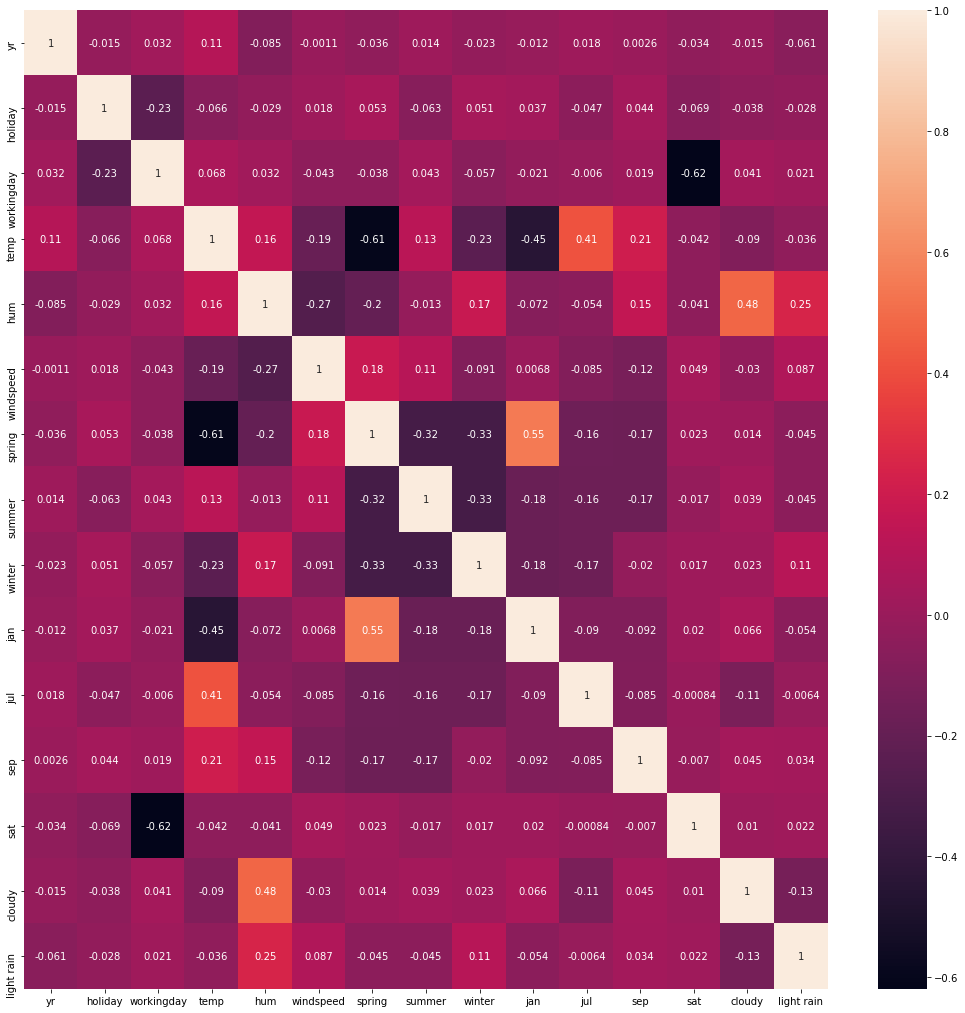

In [35]:
#Let's see the correlation heatmap once again for these variables
fig, ax = plt.subplots(figsize=(18,18))
sns.heatmap(x_train_rfe.corr(), annot = True, ax = ax)
plt.show()

In [36]:
#Adding a constant term since sklearn does not automatically add constant to the model
x_train_rfe = sm.add_constant(x_train_rfe)

# Model 1

In [37]:
#Running the linear model on the now ready data
lm = sm.OLS(y_train, x_train_rfe).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.6
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          2.31e-191
Time:                        07:08:01   Log-Likelihood:                 519.88
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     494   BIC:                            -940.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2510      0.036      6.949      0.0

In [38]:
#Checking VIF
getvif(x_train_rfe)

,Features,VIF
4,hum,29.40
3,temp,17.77
2,workingday,5.31
5,windspeed,4.73
6,spring,4.53
8,winter,3.48
7,summer,2.84
13,cloudy,2.29
0,yr,2.09
12,sat,1.98


##### We see that there are many variables with a considerably high VIF. 
##### We will start dropping variables from our model now, one by one, in an attempt to make the model simpler (less variables), while still maintaining a good r squared 
##### We will also be using the p-value (significance) of the varible as a criteria to determine if we can retain a variable

In [39]:
#Dropping hum since it has a very high VIF and most of the impact from this variable can be explained by other variables 
x_train_rfe2 = x_train_rfe.drop('hum',axis=1)

# Model 2

In [40]:
#Building new model without hum variable
lm2 = sm.OLS(y_train, x_train_rfe2).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.3
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          7.33e-189
Time:                        07:08:02   Log-Likelihood:                 511.16
No. Observations:                 510   AIC:                            -992.3
Df Residuals:                     495   BIC:                            -928.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1737      0.031      5.525      0.0

##### The R-squared is now 0.843. 

In [41]:
#Checking VIF for variables in new model
getvif(x_train_rfe2)

,Features,VIF
3,temp,7.07
2,workingday,5.24
4,windspeed,4.67
5,spring,3.08
6,summer,2.33
0,yr,2.08
7,winter,1.99
11,sat,1.97
8,jan,1.62
9,jul,1.59


##### Seeing the VIFs, it seems that temp has a very high VIF and we should drop it. But since the temperature of the day can play a crucial role in infulencing the target variable, we will instead be dropping holiday since it is the variable which is least significant in the model

In [42]:
#Dropping holiday
x_train_rfe3 = x_train_rfe2.drop('holiday', axis = 1)

# Model 3

In [43]:
lm3 = sm.OLS(y_train, x_train_rfe3).fit()
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     203.3
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          4.11e-189
Time:                        07:08:03   Log-Likelihood:                 508.99
No. Observations:                 510   AIC:                            -990.0
Df Residuals:                     496   BIC:                            -930.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1656      0.031      5.294      0.0

##### The model still has a good R-squared value of 0.842

In [44]:
#Checking VIF again 
getvif(x_train_rfe3)

,Features,VIF
2,temp,6.82
1,workingday,4.68
3,windspeed,4.66
4,spring,2.99
5,summer,2.31
0,yr,2.08
6,winter,1.92
10,sat,1.84
7,jan,1.62
8,jul,1.59


In [45]:
#Dropping variable jan since it is turning out to be realtively less significant
x_train_rfe4 = x_train_rfe3.drop('jan', axis = 1)

# Model 4

In [46]:
lm4 = sm.OLS(y_train, x_train_rfe4).fit()
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     218.1
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          3.28e-189
Time:                        07:08:04   Log-Likelihood:                 506.42
No. Observations:                 510   AIC:                            -986.8
Df Residuals:                     497   BIC:                            -931.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1493      0.031      4.886      0.0

In [47]:
#checking VIFs
getvif(x_train_rfe4)

,Features,VIF
2,temp,6.73
1,workingday,4.65
3,windspeed,4.64
4,spring,2.38
5,summer,2.31
0,yr,2.07
6,winter,1.92
9,sat,1.83
7,jul,1.58
10,cloudy,1.56


In [48]:
#Dropping hul since it realtively less significant
x_train_rfe5 = x_train_rfe4.drop('jul', axis = 1)

# Model 5

In [49]:
lm5 = sm.OLS(y_train, x_train_rfe5).fit()
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     234.4
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          6.86e-189
Time:                        07:08:05   Log-Likelihood:                 502.83
No. Observations:                 510   AIC:                            -981.7
Df Residuals:                     498   BIC:                            -930.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1405      0.031      4.599      0.0

In [50]:
#Checking VIFs
getvif(x_train_rfe5)

,Features,VIF
2,temp,5.48
1,workingday,4.65
3,windspeed,4.63
4,spring,2.30
0,yr,2.07
5,summer,1.99
8,sat,1.83
6,winter,1.77
9,cloudy,1.56
7,sep,1.23


In [51]:
#Removing spring variable due to a higher VIF and lower significance
x_train_rfe6 = x_train_rfe5.drop('spring', axis=1)

# Model 6

In [52]:
lm6 = sm.OLS(y_train, x_train_rfe6).fit()
print(lm6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     254.0
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          1.47e-188
Time:                        07:08:06   Log-Likelihood:                 499.18
No. Observations:                 510   AIC:                            -976.4
Df Residuals:                     499   BIC:                            -929.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0753      0.019      4.051      0.0

In [53]:
getvif(x_train_rfe6)

,Features,VIF
2,temp,4.76
1,workingday,4.04
3,windspeed,3.43
0,yr,2.02
7,sat,1.69
4,summer,1.57
8,cloudy,1.53
5,winter,1.40
6,sep,1.20
9,light rain,1.08


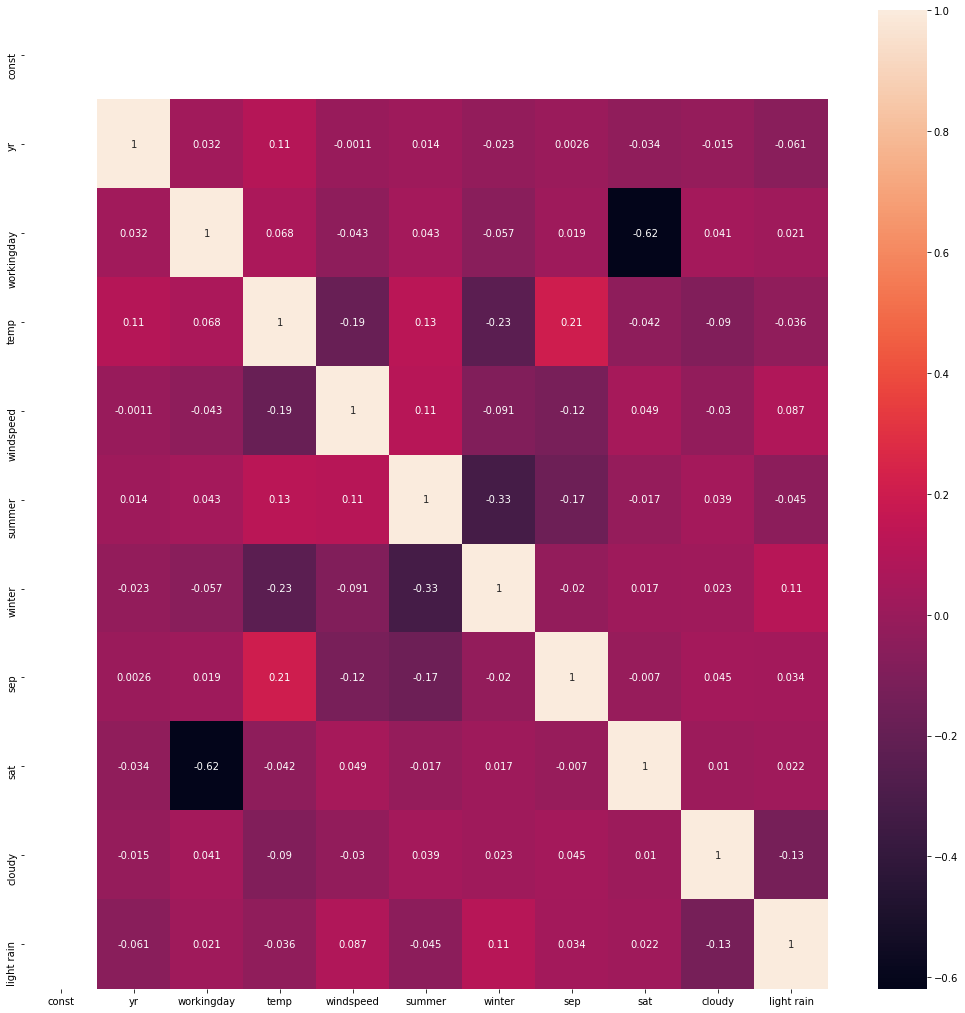

In [54]:
#Let's see the correlation heatmap once again for these variables
fig, ax = plt.subplots(figsize=(18,18))
sns.heatmap(x_train_rfe6.corr(), annot = True, ax = ax)
plt.show()

# Residual Analysis

In [55]:
#predicting y_train using the model 7 
y_train_pred = lm6.predict(x_train_rfe6)

## Verifying Assumptions of Linear Regression

We will test for the following assumptions of linear regression: 
1. Linear relationship between X and Y
2. Error terms are normally distributed (not X, Y)
3. Error terms are independent of each other
4. Error terms have constant variance (homoscedasticity)

Text(0, 0.5, 'y_pred')

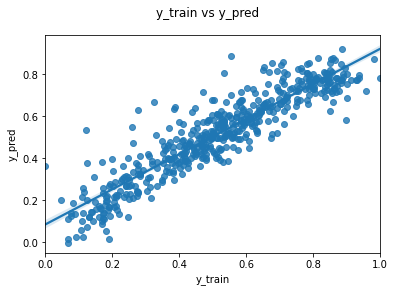

In [56]:
# Plotting y_train and y_train_pred to understand the variance from actual results in the train data
#This verifies the assumption of linearity of variables x and y (and hence linearity of the model)

fig = plt.figure()
sns.regplot(x=y_train, y=y_train_pred)
fig.suptitle('y_train vs y_pred')             
plt.xlabel('y_train')                          
plt.ylabel('y_pred')     

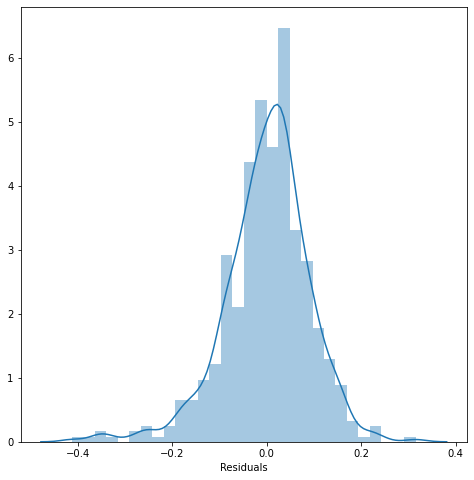

In [57]:
#Lets see the distribution of error terms in the training set
#it is coming out as normal
plt.figure(figsize=(8,8))
sns.distplot((y_train - y_train_pred.values.reshape(-1,1)))
plt.xlabel('Residuals')
plt.show()

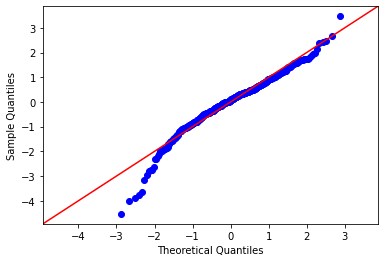

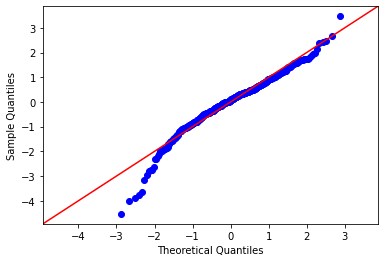

In [58]:
#Checking residuals with a qqplot, the points are either on or close to the 45 degree line, indicating that the distribution is normal
sm.qqplot(lm6.resid, line='45',fit=True)

In [59]:
#checking multicollinearity in the final model using test data.
#The max value of VIF is 4.76, which is acceptable.
#This indicates there is very little multicollinearity between our selected variables and the assumption is met.
getvif(x_train_rfe6)

,Features,VIF
2,temp,4.76
1,workingday,4.04
3,windspeed,3.43
0,yr,2.02
7,sat,1.69
4,summer,1.57
8,cloudy,1.53
5,winter,1.40
6,sep,1.20
9,light rain,1.08


In [60]:
#Mean of residuals is also very close to zero
(y_train - y_train_pred.values.reshape(-1,1)).mean()

cnt    5.354649e-16
dtype: float64

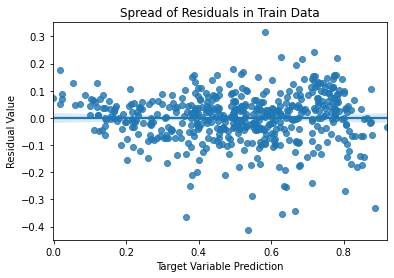

In [61]:
#We can also plot a regression line through our data to get a clear picture of the spread
#this helps us understand that error terms are independent of each other and mostly have a constant variance
sns.regplot(x=y_train_pred, y = (y_train - y_train_pred.values.reshape(-1,1))['cnt'])
plt.title('Spread of Residuals in Train Data')
plt.xlabel('Target Variable Prediction')
plt.ylabel('Residual Value')
plt.show()

### The distribution of error terms is approaching a normal distribution, this implies that our model is perfoming well in terms of assumptions of linear regression

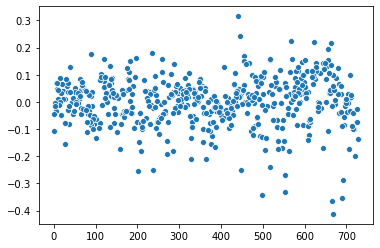

In [62]:
#Visualzing residual terms
res_train = y_train - y_train_pred.values.reshape(-1,1)
sns.scatterplot(x=res_train.index, y=res_train.values.reshape(-1,))
plt.show()

#### Error terms do appear to be independent of one another with an almost constant variance

# Making Predictions on Test Data

### Scaling numerical variables on test set using the scaler used on train set

In [63]:
#We will only use the transform method and not fit_transform since fitting is done on the train set only
df_test[to_scale] = scaler.transform(df_test[to_scale])

In [64]:
df_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep,mon,sat,sun,thu,tue,wed,cloudy,light rain
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.558941,0.638508,0.313350,0.520592,0.255708,0.264840,0.232877,0.059361,0.086758,0.100457,0.077626,0.105023,0.095890,0.054795,0.086758,0.073059,0.082192,0.086758,0.127854,0.118721,0.146119,0.164384,0.164384,0.100457,0.319635,0.027397
std,0.500722,0.188034,0.459904,0.233698,0.148974,0.159947,0.218435,0.437258,0.442259,0.423633,0.236840,0.282125,0.301297,0.268194,0.307285,0.295115,0.228100,0.282125,0.260830,0.275286,0.282125,0.334692,0.324202,0.354034,0.371472,0.371472,0.301297,0.467403,0.163612
min,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.527265,0.198517,0.377531,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.627737,0.299459,0.524275,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.743928,0.403048,0.672745,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [65]:
### Dividing into x_test and y_test
y_test = df_test.pop('cnt')
x_test = df_test

In [66]:
y_test.head()

184    0.692706
535    0.712034
299    0.303382
221    0.547400
152    0.569029
Name: cnt, dtype: float64

In [67]:
x_test.head()

,yr,holiday,workingday,temp,hum,windspeed,spring,summer,winter,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep,mon,sat,sun,thu,tue,wed,cloudy,light rain
184,0,1,0,0.831783,0.657364,0.084219,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0
535,1,0,1,0.901354,0.610133,0.153728,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
299,0,0,1,0.511964,0.837699,0.334206,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0
221,0,0,1,0.881625,0.437098,0.339570,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
152,0,0,1,0.817246,0.314298,0.537414,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0


In [68]:
#adding constant for using sm
x_test_sm = sm.add_constant(x_test)

In [69]:
#Creating a predictor dataframe by only retaining the variables we retained in our model (Model 6)
x_test_m6 = x_test_sm[(x_train_rfe6.columns)]

In [70]:
x_test_m6.head()

,const,yr,workingday,temp,windspeed,summer,winter,sep,sat,cloudy,light rain
184,1.0,0,0,0.831783,0.084219,0,0,0,0,1,0
535,1.0,1,1,0.901354,0.153728,1,0,0,0,0,0
299,1.0,0,1,0.511964,0.334206,0,1,0,0,1,0
221,1.0,0,1,0.881625,0.339570,0,0,0,0,0,0
152,1.0,0,1,0.817246,0.537414,1,0,0,0,0,0


In [71]:
#Making predictions using Model 6
y_test_pred_m6 = lm6.predict(x_test_m6)

## Model Evaulation

In [72]:
#Performance of model 6 on test data
modeleval(y_test,y_test_pred_m6, x_test_m6)

R2 Score of Model
0.7955844377237248

Mean Absolute Error
0.07598121689152804

Mean Squared Error
0.009708882328806267

Root Mean Squared Error
0.09853366089213507

Adjusted R-squared
0.7847217749940676


#### The model shows an r-squared value of 0.836 on the training data and 0.795 on the test data, which is decent. The RMSE is 0.09 which is also considerably low, given that all our variables were scaled between 0 and 1. The adjusted r-squared reported by the model on the test data is 0.785
#### Overall, this seems to be a good model.

Text(0, 0.5, 'y_pred')

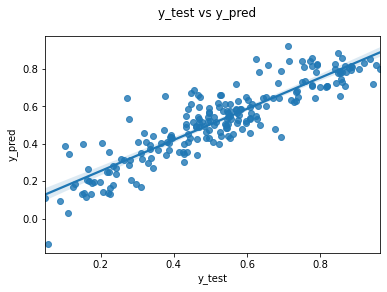

In [73]:
# Plotting y_test and y_pred to understand the variance from actual results in the test data
#This verifies the assumption of linearity of variables x and y (and hence linearity of the model)

fig = plt.figure()
sns.regplot(x=y_test, y=y_test_pred_m6)
fig.suptitle('y_test vs y_pred')             
plt.xlabel('y_test')                          
plt.ylabel('y_pred')      

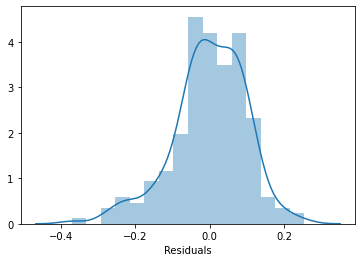

In [74]:
#Error terms are approximately normally distributed in the test data as well, thus meeting the assumption of linear regression
sns.distplot(((y_test - y_test_pred_m6)))
plt.xlabel('Residuals')
plt.show()

In [75]:
#Mean of residuals is also very close to zero
(y_test - y_test_pred_m6).mean()

-0.000992880324030444

In [76]:
#checking multicollinearity in the final model using test data.
#The max value of VIF is 4.99, which is acceptable.
#This indicates there is very little multicollinearity between our selected variables and the assumption is met.
getvif(x_test_m6)

,Features,VIF
2,temp,4.99
1,workingday,4.31
3,windspeed,3.88
0,yr,1.82
4,summer,1.64
7,sat,1.51
5,winter,1.48
8,cloudy,1.47
6,sep,1.23
9,light rain,1.13


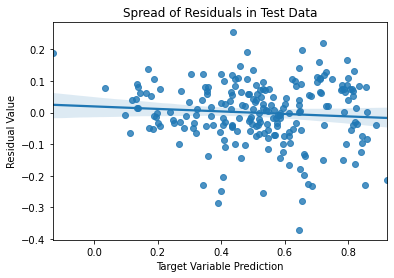

In [77]:
#We can also plot a regression line through this data to get a clear picture of the spread
#this helps us understand that error terms are independent of each other and mostly have a constant variance
sns.regplot(x=y_test_pred_m6, y = y_test - y_test_pred_m6)
plt.title('Spread of Residuals in Test Data')
plt.xlabel('Target Variable Prediction')
plt.ylabel('Residual Value')
plt.show()

# Conclusion

We can safely select the Model 6 as our final model since it has performed well on the test data and has an r-squared value of 0.795 and an RMSE of 0.098. 

In [78]:
#Parameters of the final model
lm6.params.sort_values()

light rain   -0.288021
windspeed    -0.155238
cloudy       -0.081347
workingday    0.056323
sat           0.067688
const         0.075325
summer        0.087429
sep           0.097236
winter        0.131826
yr            0.233056
temp          0.549936
dtype: float64

Based on the paremters selected in the final model, we can make the following suggestions to the business to explain the impact of various variables on the total ridership

* Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    * The above listed weather conditions have a heavy negative impact on the ridership. Whenever the weather situation is one of those listed above, the company can expect their ridership to go down. 
* Temperature
    * The temperature of the day has a good positive effect on the ridership, and is the most significant variable in determining the count of riders using the company's services. The higher the temperature, the more the ridership will be. For every unit of increase in temperature, keeping all other variables constant, the ridership (cnt) would go up by 0.55, which is considerably large. 
* Year
    * Since we have analyzed historical data, it has been observed that the ridership in general was higher in 2019 as compared to 2018. This might mean that there were some factors that the company had changed in 2019 that were not present in 2018
* Windspeed
    * The windspeed of the day also has a negative impact on ridership. People tend to not rent bikes on windy days. 
* Winter
    * The ridership is expected go slightly up in winter months as compared to summer. Since temperature is also a crucial factor, warm winter days are turning out to be the best for the company's business.